In [3]:
# import package from mlpipeline
from config import cmd_arguments
import cocitedata
import matplotlib.pyplot as plt
import os
import pandas as pd
import tqdm

def load_data():
    testargs = ["--data_dir", "../../external_projects/bva-citation-prediction/data/preprocessed-cached/preprocessed-cached-v4/"]

    args = cmd_arguments(testargs=testargs)
    data_dir_name = cocitedata.dataset_filepath(args)
    cocitedata.generate_ds_if_not_cached(data_dir_name, args)
    # df = cocitedata.parquet_to_dataframe(data_dir_name, args)
    parquet_files = [os.path.join(data_dir_name, f) for f in os.listdir(data_dir_name) if f.endswith('.parquet')]
    return parquet_files

2022-06-25 13:53:32.715834: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-25 13:53:32.715870: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
files = load_data()

counts = pd.Series(dtype=int)
for path in tqdm.tqdm(files):
    df = pd.read_parquet(path)
    counts = counts.add(df['label'].value_counts(), fill_value=0)
counts = counts.astype(int)


parquet file already exists, loading parquet...


100%|██████████| 3244/3244 [07:05<00:00,  7.63it/s]


In [47]:
counts = counts.sort_values(ascending=False)
relative_counts = counts / counts.sum()
print(" total citations", counts.sum())
print("unique citations", len(counts))

 total citations 6999940
unique citations 114778


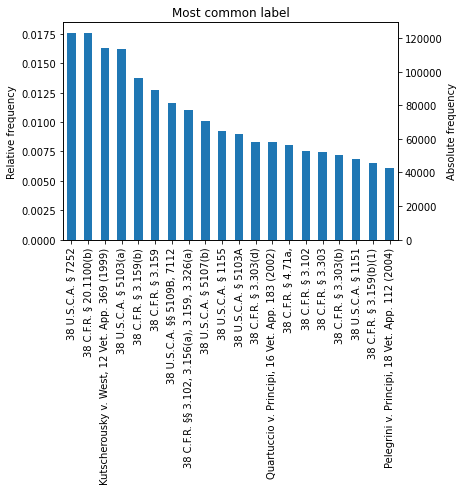

In [11]:
plt.title("Most common label")
relative_counts[:20].plot(kind="bar")
# ylabel
plt.ylabel("Relative frequency")
# second ylabel absolute frequency
plt.twinx()
counts[:20].plot(kind="bar")
plt.ylabel("Absolute frequency")
plt.show()

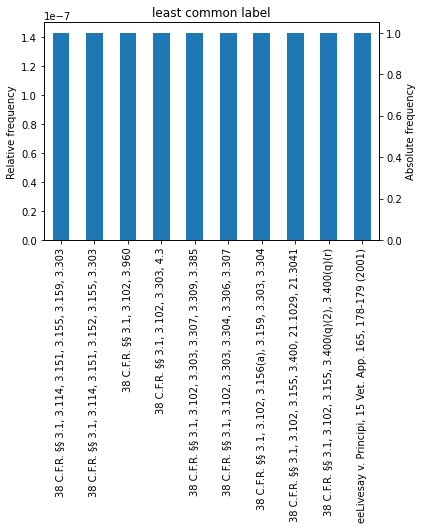

In [16]:
plt.title("least common label")
relative_counts[-10:].plot(kind="bar")
# ylabel
plt.ylabel("Relative frequency")
# second ylabel absolute frequency
plt.twinx()
counts[-10:].plot(kind="bar")
plt.ylabel("Absolute frequency")
plt.show()

In [42]:
import plotly.express as px

def plot_percentiles(percentiles, counts):
    citations_per_percentile = counts.quantile(percentiles)
    # create the same scatter plot in plotly

    fig = px.scatter(x=percentiles, y=citations_per_percentile, labels={"x": "percentile", "y": "avg Number of citations"}, log_y=True)
    title = "percentiles of citations per document"
    fig.update_layout(title_text=title)
    fig.update_xaxes(title_text="percentile")
    fig.update_yaxes(title_text="avg Number of citations")
    fig.show()



In [45]:
percentiles = [(i/100) for i in range(0, 100)]
plot_percentiles(percentiles, counts)
percentiles = [(i/10000 + 0.99) for i in range(0, 100)]
plot_percentiles(percentiles, counts)


In [ ]:
# loop through csv files and add the counts to the csv data

